# Центральная предельная теорема своими руками 

In [2]:
import pandas as pd
import scipy.stats as sts
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Распределение Парето

###  

Строим гистограмму и теоретическую плотность распределения:

C:\ProgramData\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:6571: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


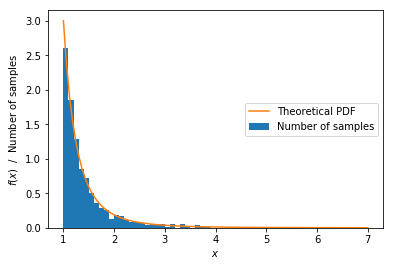

In [3]:
k = 3     # задаем параметр k- это коэффицент кривизны для нашего распределения Парето
pareto_distribution = sts.pareto(k)      # используем встроенную в пакет scipy.stats функцию pareto 
sample_pareto = pareto_distribution.rvs(size=1000)     # генерируем случайную выборку объемом 1000
plt.hist(sample_pareto, range=(1,5), bins=40, normed=True, label='Number of samples')  
x = np.linspace(1,7,100)      # задаем диапазон значений для x
pdf_pareto = pareto_distribution.pdf(x)    # вычисляем теоретическую плотность распределения нашей случайной велечины
plt.plot(x, pdf_pareto, label='Theoretical PDF') 
plt.ylabel('$f(x)$  /  Number of samples')
plt.xlabel('$x$')
plt.legend(loc='center right')


###   
Определим функцию set_mean_pareto, которая будет возвращать список значений выборочных средних для нашего распределения Парето, принимая на вход объем выборки:

In [4]:
def set_mean_pareto(n):
    set_of_mean = []
    for i in range(1000):         
        sample_i = sts.pareto.rvs(3, size=n)      # коэффициент кривизны задается явно, k =3 
        set_of_mean.append(sum(sample_i) / n)     # рассчитываем выборочное среднее и добавляем в список
    return set_of_mean
        

#  
Теперь определим значения параметров нормальных распределений, которыми, согласно центральной предельной теореме, приближаются распределения наших выборочных средних.
Вычислим параметры среднего: $$E = {x_m k \over {(k-1)}}$$  
И дисперсии: $$ D = {x_mk \over {(k-1)^2} (k-2) }$$

In [5]:

x_m = 1.0       # минимальное значение, которое принимает x (при использовании функции sts.pareto.rvs 
              # может задаваться аргументом scale, по умолчанию scale=1)
    
k = 3.0        # k- коэффициент кривизны

E = (x_m*k) / (k-1)    # определяем среднее, оно же математическое ожидание

D = k*x_m / (((k-1)**2) * (k-2))  # дисперсия (стандартное отклонение в квадрате)

def sigma(n):                    # определяем функцию для рассчета стандартного отклонения в зависимости от объема выборки
    return np.sqrt(D / n)


#  
### Рассчитываем выборки объемом 5, 10, 50, 100

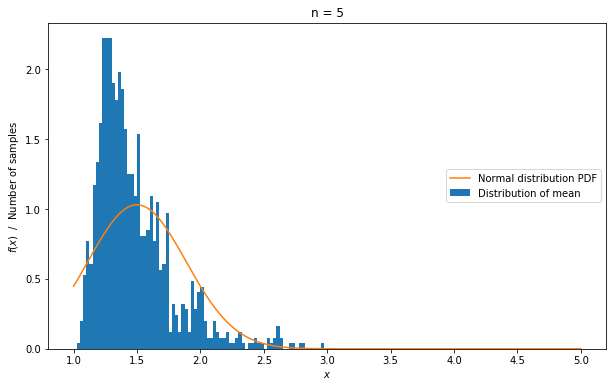

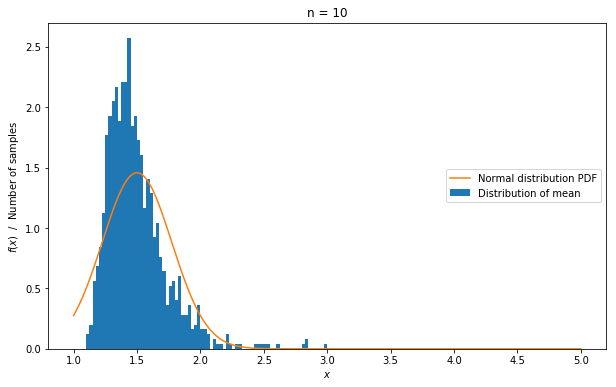

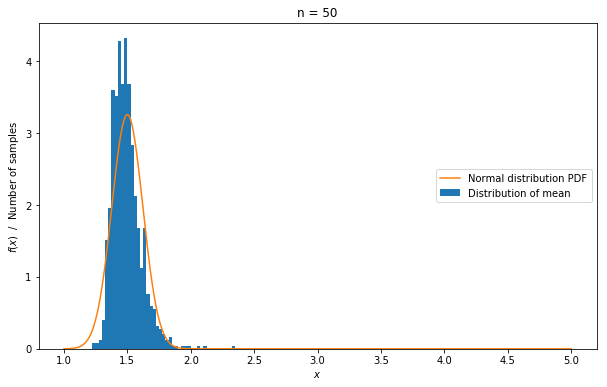

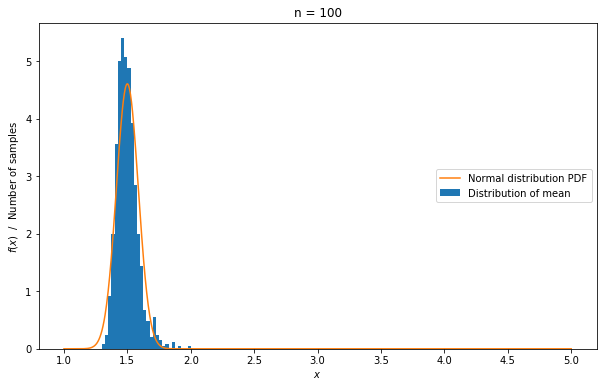

In [20]:
for n in [5, 10, 50, 100]:
    figsize = (10, 6)
    fig = plt.figure(figsize=figsize)
    mean_pareto = set_mean_pareto(n)       # получаем список из 1000 выборочных средних для выборки объемом n         
    plt.hist(mean_pareto, bins=80, range=(1,3), label='Distribution of mean', normed=True) # строим гистограмму
                                                                                        # выборочных средних

    x = np.linspace(1, 5, 1000)      # значения аргумента x задаем с помощью функции np.linspce()
    pdf_normal = sts.norm(E, sigma(n)).pdf(x)      # задаем нормальное распределение, которым приблизим значения наших 
                                                      # выборочных средних  

    plt.plot(x, pdf_normal, label='Normal distribution PDF')    
    plt.xlabel('$x$')
    plt.ylabel('$f(x)$  /  Number of samples')
    plt.title('n = %d' % n)
    plt.legend(loc='center right')                     

### Вывод
При незначительных значениях n, объем выборки не позволяет точно саппроксимировать норомальным распределением разброс наших выборочных средних. Но уже на графике, при n=50, виден прогресс в точности приближения. Если же взглянуть на приближение при n=100, то график плотности нормального распределения с высокой точностью обрисовывает контур нашей гистограммы.

Из всего вышеизложенного ясно следует, что точность аппроксимации разброса значений выборочных средних нормальным увеличивается с ростом n (объем выборки).
